## Import libaries

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load The csv Data


In [113]:
#We are trying to predict the patient that will come the AppointmentDay
noapp= pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

## Start to make Data wrangling
    First: Renamed the column name “No-Show” to “Show”.
    Second: Replaced the values of the column Show {“No : Yes” , ”Yes : No”}.
    Third: inserted new column of time from the Scheduled Day time.
    Foruth: I have deleted the time of Hours:Minutes:Seconds from Appointment Day.
    Fifth: I have deleted the time of Hours:Minutes:Seconds from Scheduled Day.
    sixth: Changed ScheduledDay and AppointmentDay to DateTime type instead of string.

In [114]:
noapp.rename(columns={"No-show": "Show"},inplace=True)
noapp['Show'].replace({"No":'Yes',"Yes":"No"},inplace=True)
noapp['Time']=noapp['ScheduledDay'].apply(lambda x: x[11:-1])
noapp['ScheduledDay']=noapp['ScheduledDay'].apply(lambda x: x[0:10])
noapp['AppointmentDay']=noapp['AppointmentDay'].apply(lambda x: x[:10])
noapp['AppointmentDay'] = pd.to_datetime(noapp['AppointmentDay'])
noapp['ScheduledDay'] = pd.to_datetime(noapp['ScheduledDay'])
noapp.head(10)

#Side note : there is no null values in the dataset

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,Time
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,18:38:08
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,16:08:27
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,16:19:04
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,17:29:31
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,16:07:23
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,Yes,08:36:51
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,No,15:05:12
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,No,15:39:58
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,Yes,08:02:16
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,Yes,12:48:25


##  Slice whole dataset into two dataframes
    Collect all days that people showed up to dataframe called 'showup'
    Collect all days that people didnt showed up to dataframe called 'absent'

In [115]:
showup=noapp.loc[noapp['Show'] == 'Yes']
absent=noapp.loc[noapp['Show'] == 'No']

## Questions :
    question 1: Does SMS affect on people?
    question 2: Does the AppointmentDay itself affect on people to come dependent on ScheduledDay?
    question 3: Does the Neighbourhood make any diffrence?

# Fuctions
    Draw_Col_Bar: take column name that have value of True (1) or False (0) and compare it with Show column
    Place_Draw_Bar: take Neighbourhood value that have a name of a place and compare it with Show column


In [116]:
#function to draw values with True 1 or False 0 
def Draw_Col_Bar(column_name):
    
    column_total_1 = noapp.query(f"{column_name} == 1")
    column_attend_1 = noapp.query(f"{column_name} == 1 and Show=='Yes'")
    column_absent_1 = noapp.query(f"{column_name} == 1 and Show=='No'")

    column_total_0 = noapp.query(f"{column_name} == 0 ")
    column_attend_0= noapp.query(f"{column_name} == 0 and Show=='Yes'")
    column_absent_0 = noapp.query(f"{column_name}== 0 and Show=='No'")
    
    column_attend_1 = column_attend_1.shape[0]/column_total_1.shape[0]
    column_absent_1 = column_absent_1.shape[0]/column_total_1.shape[0]
    plt.bar(["attend_1 "+str(int(column_attend_1*100))+'%', "didnt come_1 "+str(int(column_absent_1*100))+'%'], [column_attend_1, column_absent_1])
    
    column_attend_0 = column_attend_0.shape[0]/column_total_0.shape[0]
    column_absent_0 = column_absent_0.shape[0]/column_total_0.shape[0]
    plt.bar(["attend_0 "+str(int(column_attend_0*100))+'%', "didnt come_0 "+str(int(column_absent_0*100))+'%'], [column_attend_0, column_absent_0])
    plt.xticks(rotation=45)
    plt.title(f'{column_name}')
    plt.ylabel('percent')

In [117]:
#function to draw place with Strings
def Place_Draw_Bar(place):
    place_total=noapp.query(f"Neighbourhood=='{place}'")
    place_Yes=noapp.query(f"Neighbourhood=='{place}' and Show=='Yes' ")
    place_No=noapp.query(f"Neighbourhood=='{place}' and Show=='No' ")

    place_Yes = place_Yes.shape[0]/place_total.shape[0]
    place_No = place_No.shape[0]/place_total.shape[0]
    plt.bar(["attend "+str(int(place_Yes*100))+'%', "didnt come "+str(int(place_No*100))+'%'], [place_Yes,place_No])
    
    plt.title(f'{place}')
    plt.ylabel('percent')

# Testing some values manually and comparing them


Text(0, 0.5, 'percent')

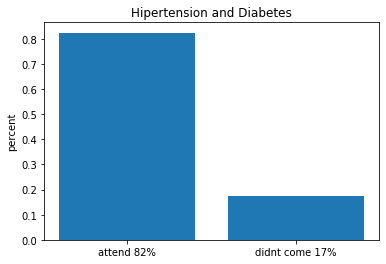

In [118]:
HD = noapp.query("Hipertension==1 and Diabetes==1 ")
HD_attend = noapp.query("Hipertension==1 and Diabetes==1 and Show == 'Yes' ")
HD_absent = noapp.query("Hipertension==1 and Diabetes==1 and Show == 'No' ")

HD_attend = HD_attend.shape[0]/HD.shape[0]
HD_absent = HD_absent.shape[0]/HD.shape[0]
plt.bar(["attend "+str(int(HD_attend*100))+'%', "didnt come "+str(int(HD_absent*100))+'%'], [HD_attend,HD_absent])
plt.title('Hipertension and Diabetes')
plt.ylabel('percent')

Text(0, 0.5, 'percent')

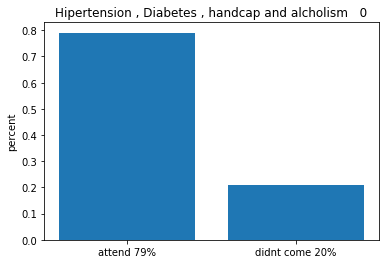

In [119]:
HDHA = noapp.query("Hipertension==0 and Diabetes==0 and Handcap==0 and Alcoholism==0 ")
HDHA_attend = noapp.query("Hipertension==0 and Diabetes==0 and Handcap==0 and Alcoholism==0 and Show == 'Yes'")
HDHA_absent = noapp.query("Hipertension==0 and Diabetes==0 and Handcap==0 and Alcoholism==0 and Show == 'No'")

HDHA_attend = HDHA_attend.shape[0]/HDHA.shape[0]
HDHA_absent = HDHA_absent.shape[0]/HDHA.shape[0]
plt.bar(["attend "+str(int(HDHA_attend*100))+'%', "didnt come "+str(int(HDHA_absent*100))+'%'], [HDHA_attend,HDHA_absent])
plt.title('Hipertension , Diabetes , handcap and alcholism   0')
plt.ylabel('percent')

Text(0, 0.5, 'percent')

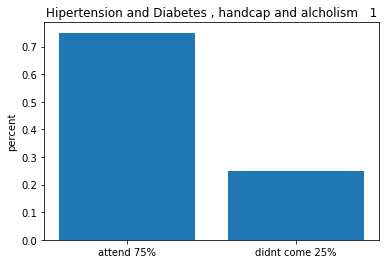

In [120]:
HDHA = noapp.query("Hipertension==1 and Diabetes==1 and Handcap==1 and Alcoholism==1 ")
HDHA_attend = noapp.query("Hipertension==1 and Diabetes==1 and Handcap==1 and Alcoholism==1 and Show == 'Yes'")
HDHA_absent = noapp.query("Hipertension==1 and Diabetes==1 and Handcap==1 and Alcoholism==1 and Show == 'No'")

HDHA_attend = HDHA_attend.shape[0]/HDHA.shape[0]
HDHA_absent = HDHA_absent.shape[0]/HDHA.shape[0]
plt.bar(["attend "+str(int(HDHA_attend*100))+'%', "didnt come "+str(int(HDHA_absent*100))+'%'], [HDHA_attend,HDHA_absent])
plt.title('Hipertension and Diabetes , handcap and alcholism   1')
plt.ylabel('percent')

<BarContainer object of 2 artists>

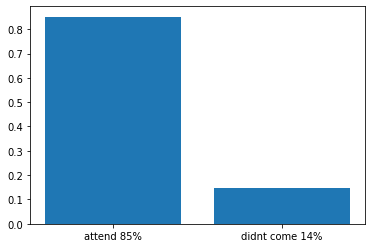

In [121]:
HDH = noapp.query("Hipertension==1 and Diabetes==1 and Handcap==1")
HDH_attend = noapp.query("Hipertension==1 and Diabetes==1 and Handcap==1 and Show == 'Yes'")
HDH_absent = noapp.query("Hipertension==1 and Diabetes==1 and Handcap==1 and Show == 'No'")

HDH_attend = HDH_attend.shape[0]/HDH.shape[0]
HDH_absent = HDH_absent.shape[0]/HDH.shape[0]
plt.bar(["attend "+str(int(HDH_attend*100))+'%', "didnt come "+str(int(HDH_absent*100))+'%'], [HDH_attend,HDH_absent])

# Creating 2 dataframes 
    Total_days_showup: is dataframes that contain the people showed up and when they booked the Appointment Day.
    Total_days_absent: is dataframes that contain the people didnt show up and when they booked the Appointment Day.
    Finally drawing them as bar chart to make comparison

In [122]:
#To check people who came to their AppointmentDay
Total_days_showup=showup.AppointmentDay - showup.ScheduledDay
Total_days_showup=Total_days_showup.value_counts().sort_index()
showup_Days=[]
for i in range(len(Total_days_showup)):
    showup_Days.append(Total_days_showup[i])
showup_Days.append(sum(showup_Days[31:]))
del showup_Days[31:-1]

showup_Days = np.asarray(showup_Days)
showup_Days = pd.DataFrame(showup_Days)

list_of_days=[]
for i in range(32):
    list_of_days.append("Day"+str(i))
showup_Days.insert(1,'Days',list_of_days)
showup_Days.rename(columns={0:'people_attend'},inplace=True)
showup_Days.set_index("Days",inplace=True)

Total_days_absent=absent.AppointmentDay - absent.ScheduledDay
Total_days_absent=Total_days_absent.value_counts().sort_index()
absent_Days=[]
for i in range(len(Total_days_absent)):
    absent_Days.append(Total_days_absent[i])
absent_Days.append(sum(absent_Days[31:]))
del absent_Days[31:-1]

absent_Days = np.asarray(absent_Days)
absent_Days = pd.DataFrame(absent_Days)

list_of_days=[]
for i in range(32):
    list_of_days.append("Day"+str(i))
absent_Days.insert(1,'Days',list_of_days)
absent_Days.rename(columns={0:'people_absent'},inplace=True)
absent_Days.set_index("Days",inplace=True)
Total_Days= pd.concat([showup_Days,absent_Days],axis=1)



# question 1: Does SMS affect on people?


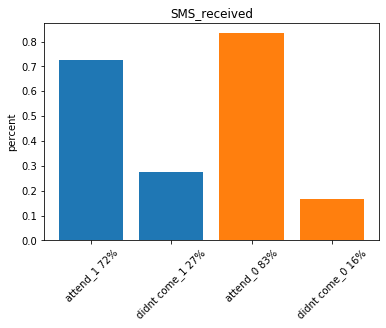

In [123]:
Draw_Col_Bar("SMS_received")

According to the bar graph of the SMS_received it appears that if you didn’t send SMS to people they will attend much more by 11%
Based on it sending SMS will decrease the people to attend to Appointment Day

#    question 2: Does the AppointmentDay itself affect on people to come dependent on ScheduledDay?


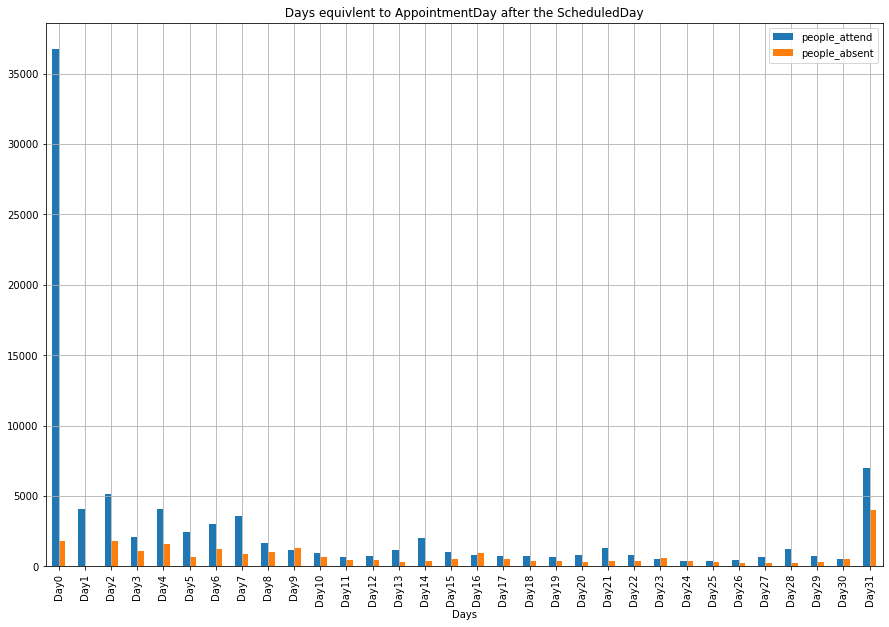

In [124]:
# Day 31 means all days booked after 30+ days from the ScheduledDay 
Total_Days.plot(kind='bar',figsize=(15,10),grid=True,title= ' Days equivlent to AppointmentDay after the ScheduledDay ')

According to my bar graph people tend to go to the Appointment day if it booked at same Scheduled Day.
Morever it mostly like 100% came to appoiment day if we booked at day 1 which mean one day after the Scheduled Day.
Based on that it's better if we manged to book the Appointment day or the day after the Scheduled Day.

Note: day31 means all the days that booked after 30 + days 


#    question 3: Does the Neighbourhood make any diffrence?

C:\Users\samer\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


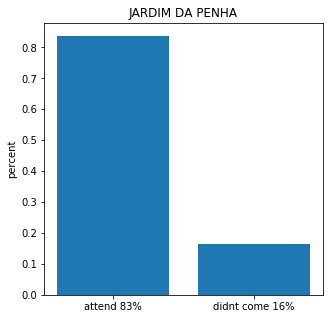

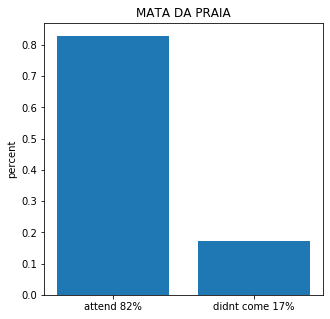

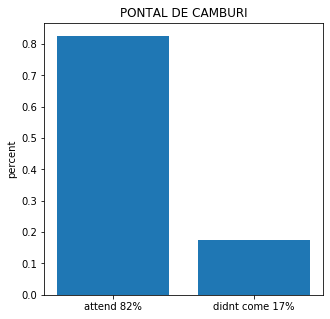

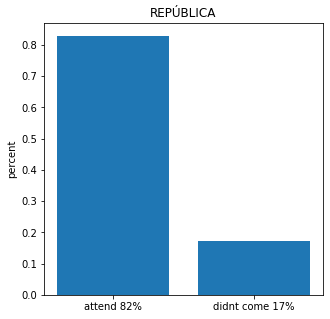

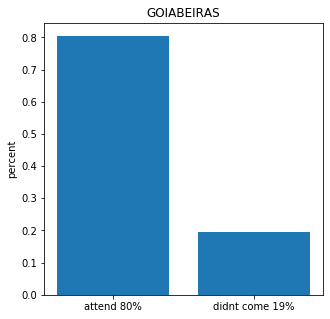

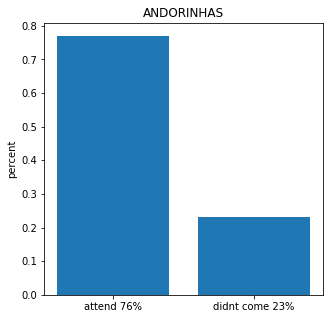

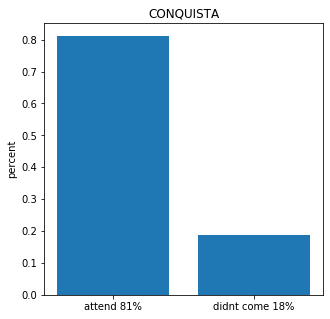

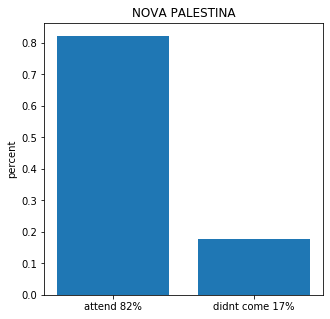

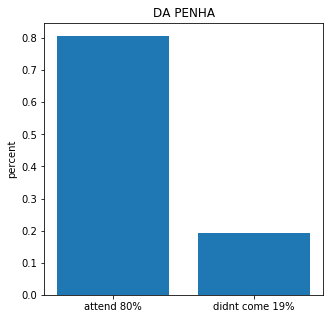

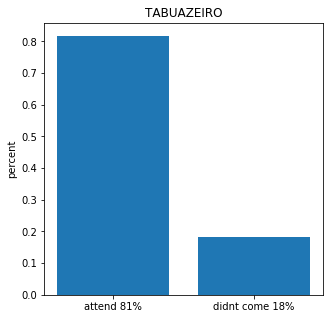

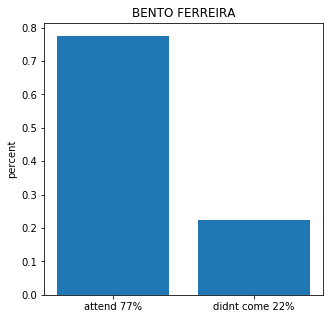

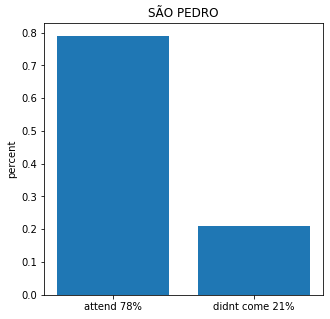

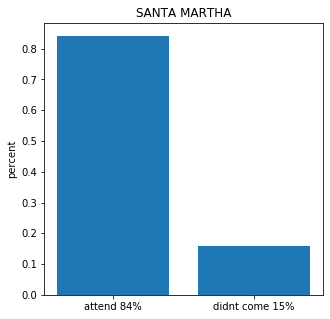

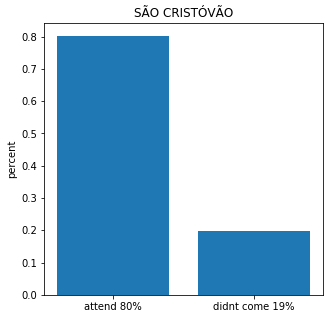

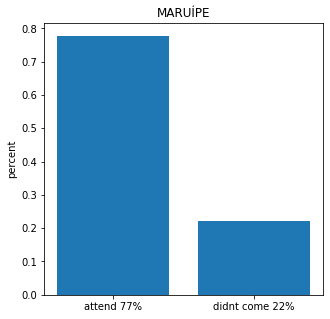

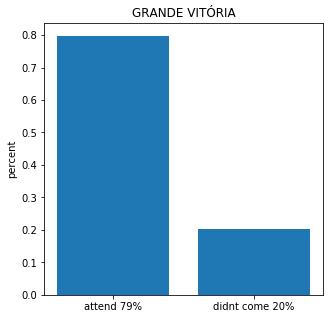

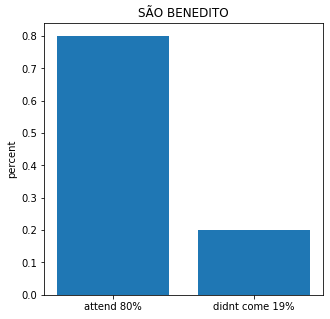

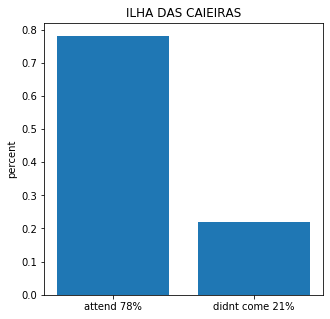

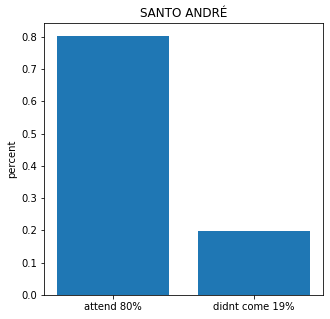

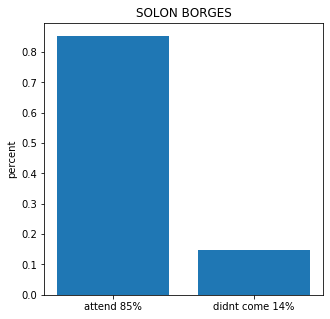

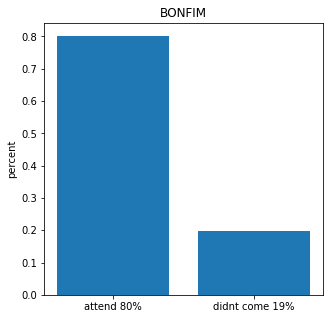

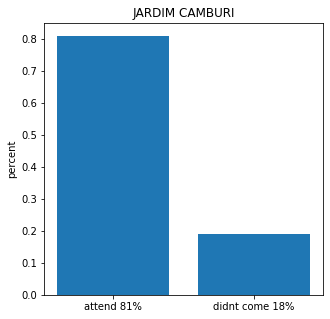

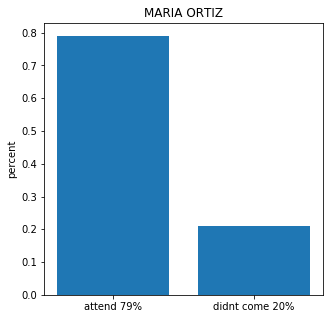

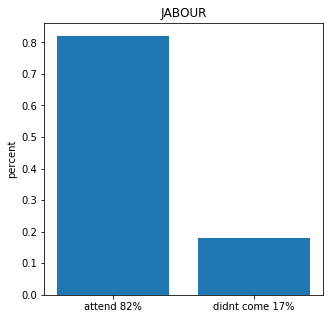

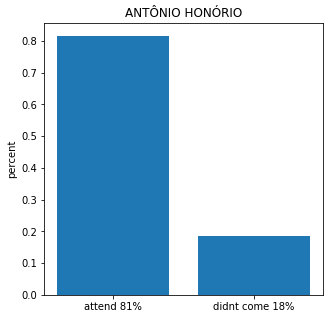

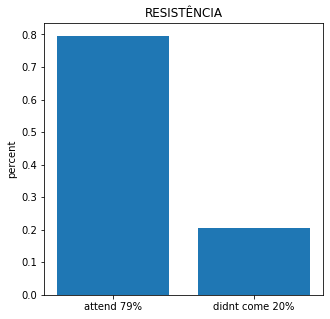

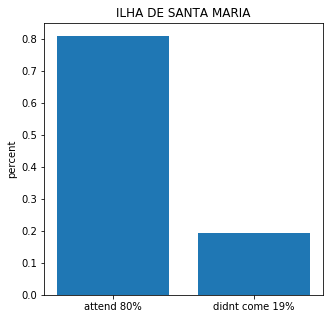

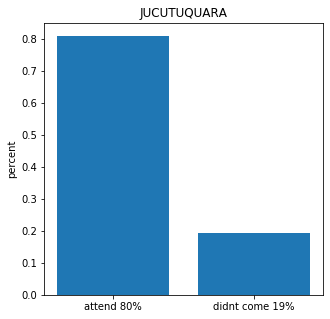

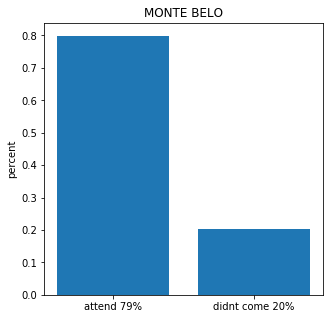

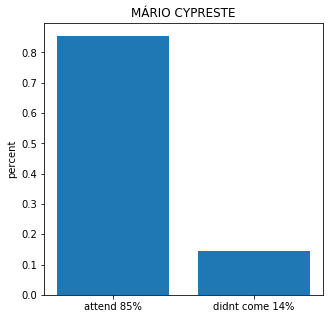

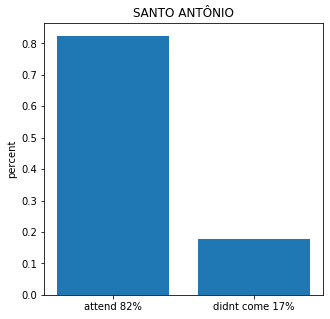

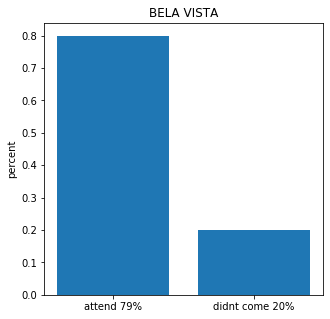

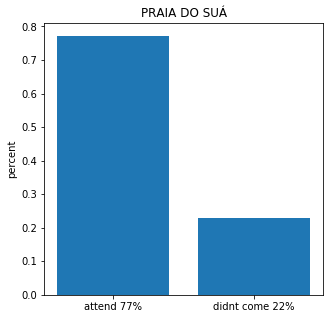

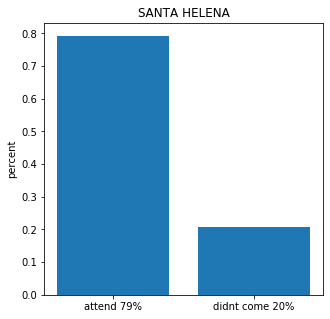

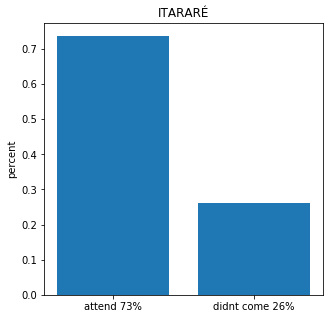

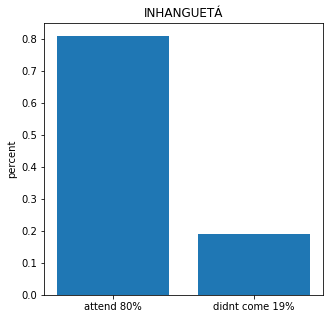

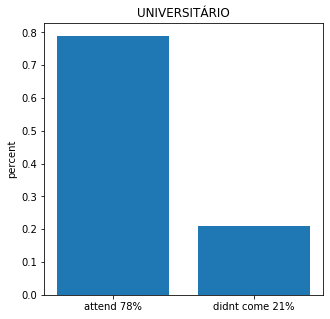

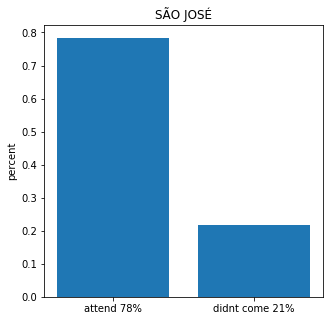

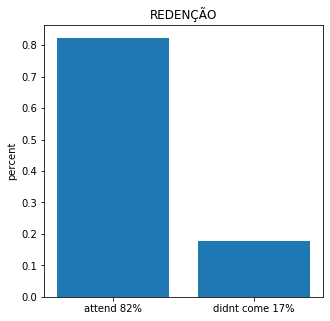

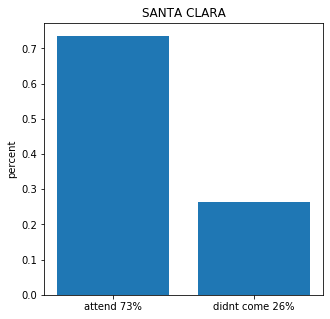

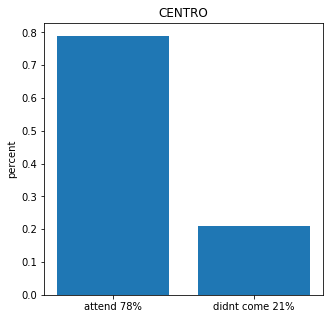

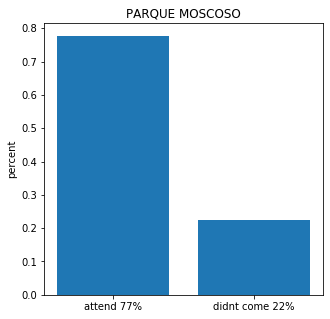

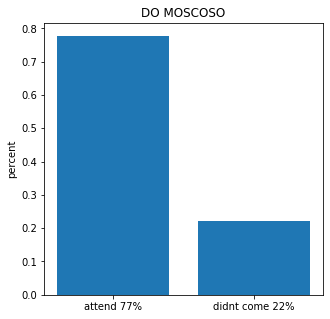

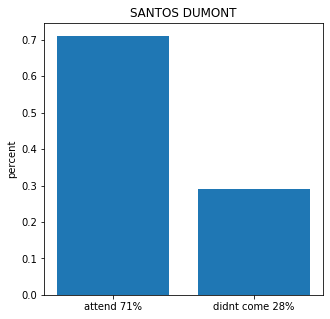

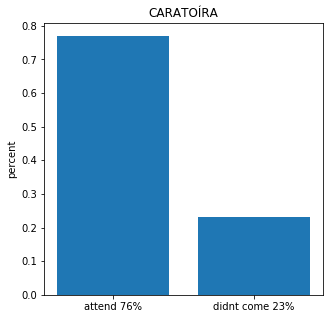

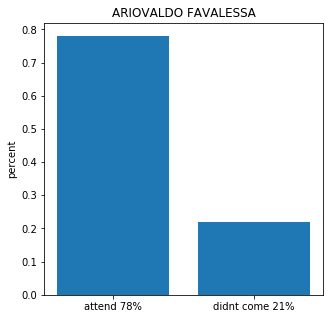

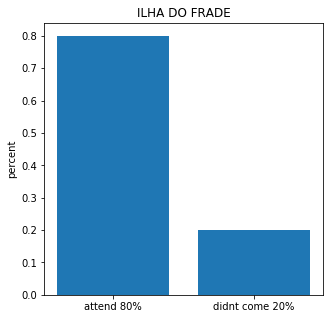

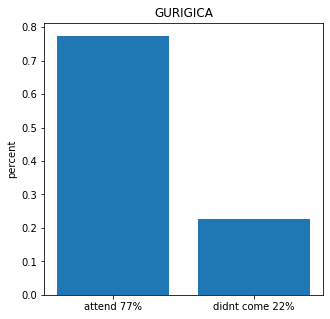

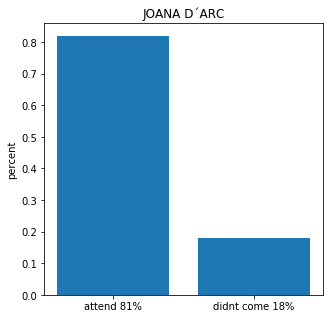

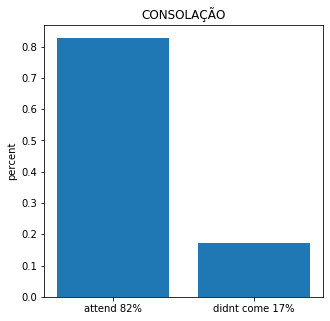

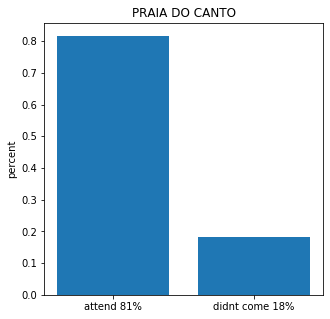

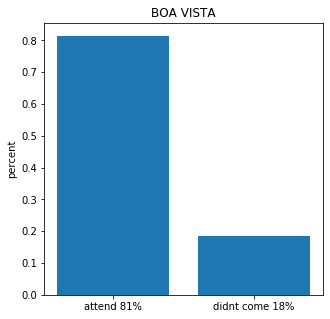

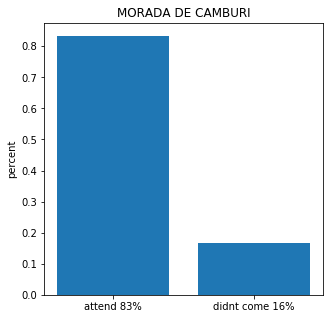

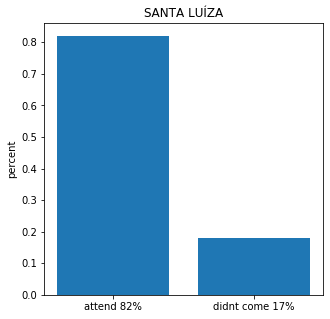

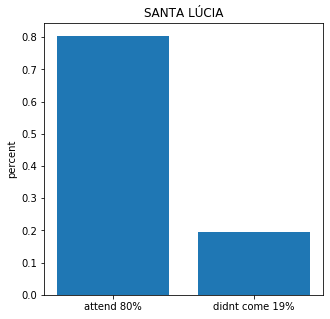

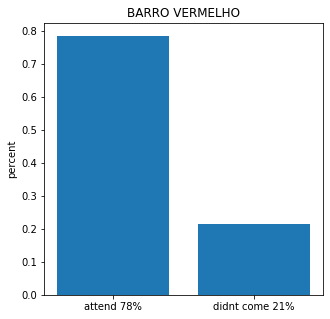

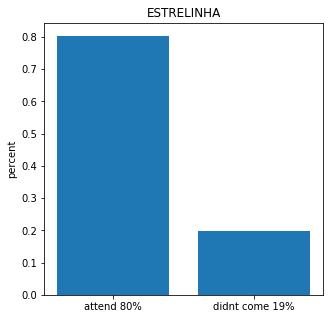

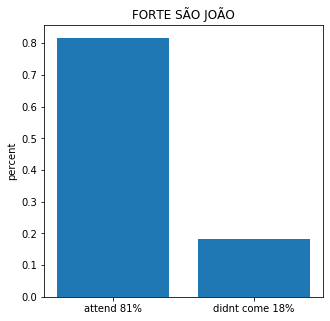

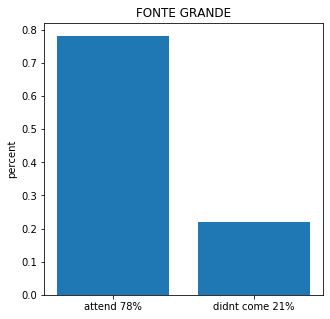

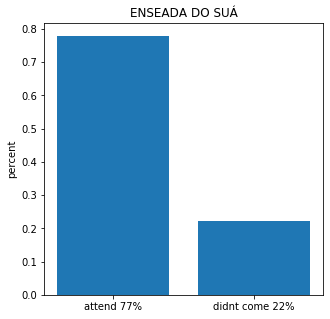

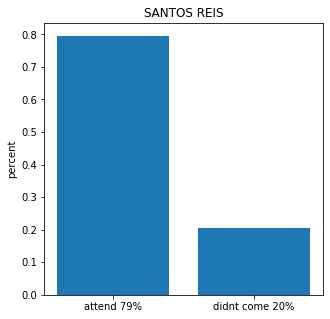

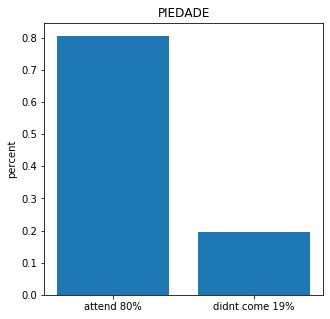

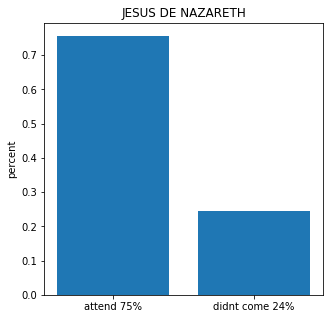

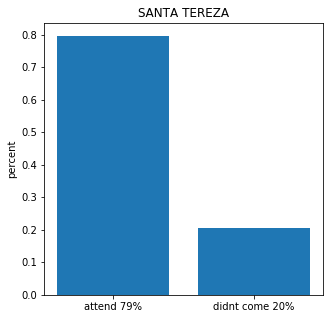

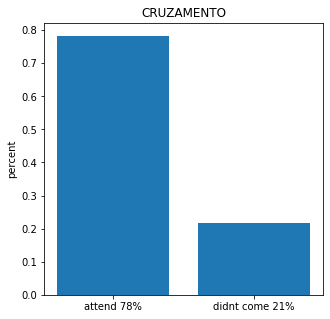

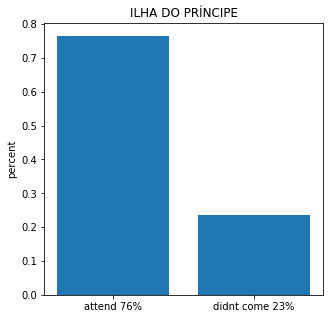

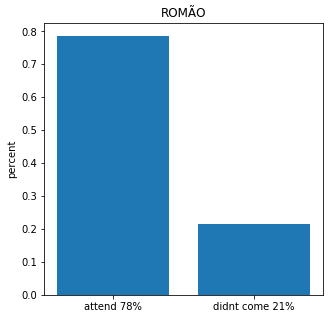

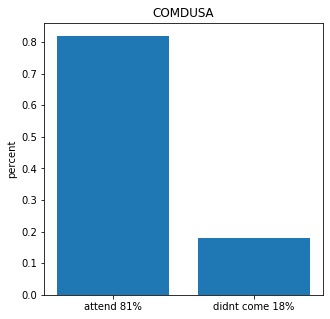

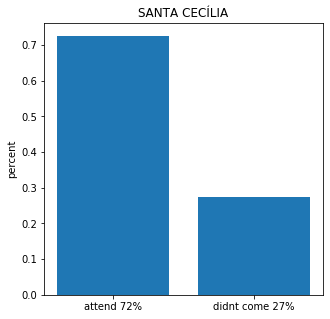

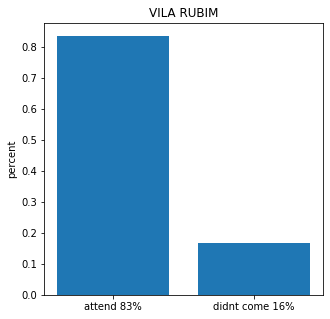

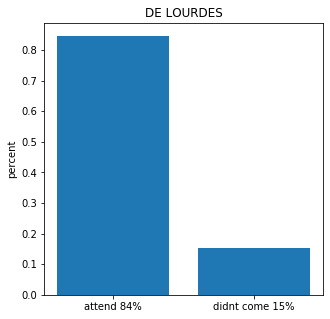

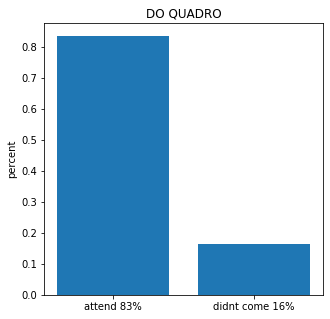

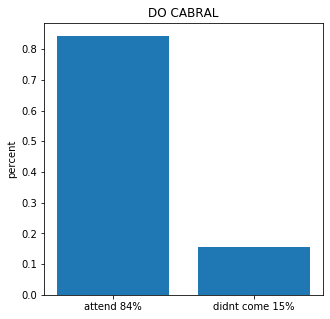

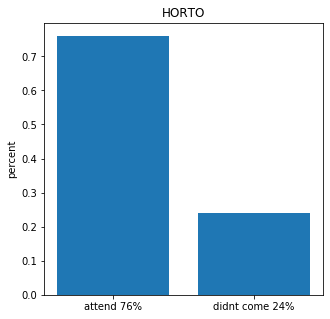

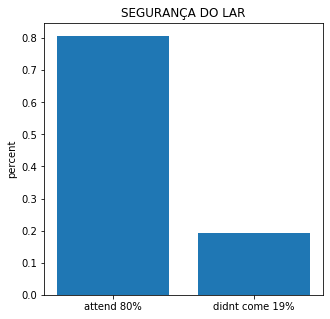

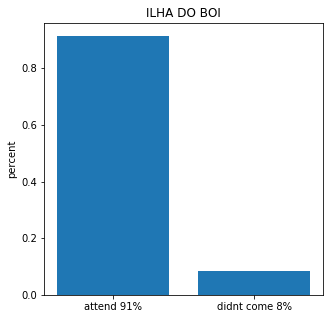

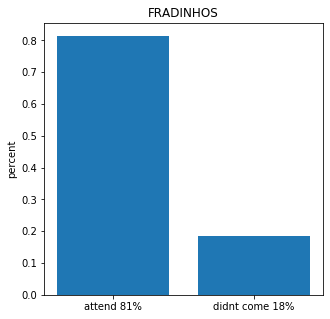

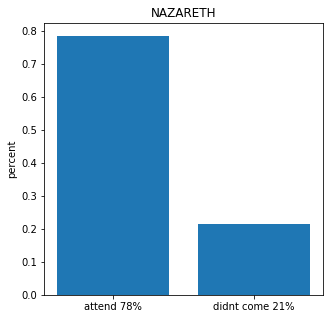

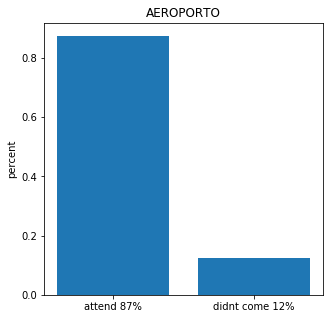

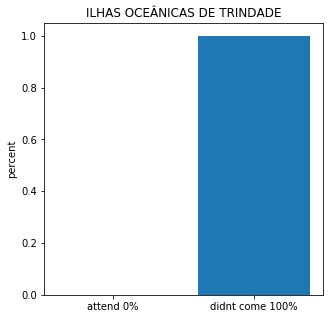

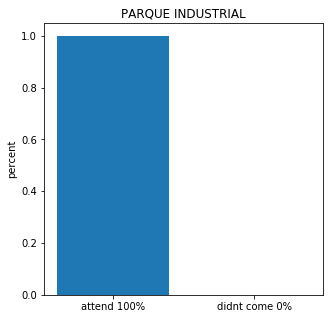

In [126]:
for name in noapp.Neighbourhood.unique():
    plt.figure(figsize=(5,5))
    Place_Draw_Bar(name)

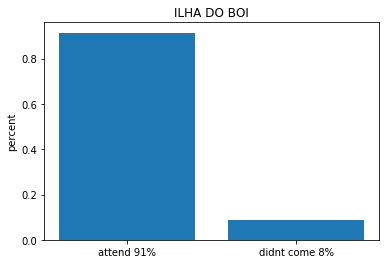

In [127]:
Place_Draw_Bar('ILHA DO BOI') 

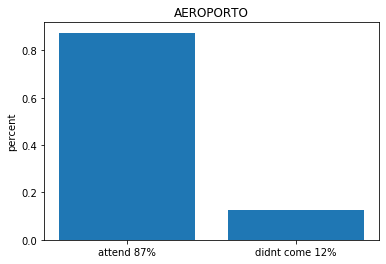

In [128]:
Place_Draw_Bar('AEROPORTO') 

Based on the two bar graphs for places ILHA DO BOI and AEROPORTO 
The patients will come to Appointment day in ILHA DO BOI with percent 91% (Highest Neighborhood in people attending)

While in AEROPORTO they will come with 87% (2nd highest Neighborhood in people attending)

in a conclusion it best to give this Neighborhood to patients

# Age histrogram graph
    To know what is the most age attended
    0 and -1 values means babies and perganat women 

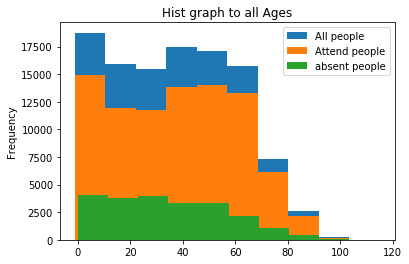

In [125]:
ax=noapp.Age.plot(kind='hist',label='All people',legend=True,title='Hist graph to all Ages',)
ax=showup.Age.plot(kind='hist',label='Attend people',legend=True)
ax=absent.Age.plot(kind='hist',label='absent people',legend=True)


# Using my Draw_Col_Bar to compare the diseases 

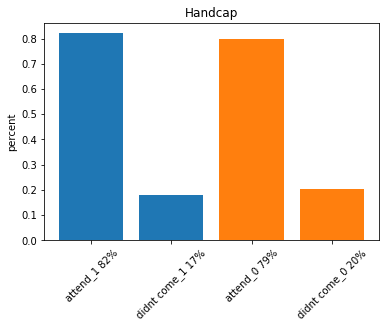

In [129]:
Draw_Col_Bar("Handcap")

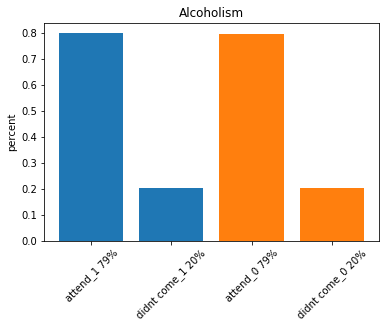

In [130]:
Draw_Col_Bar("Alcoholism") 

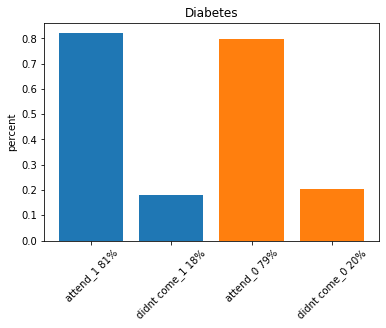

In [131]:
Draw_Col_Bar("Diabetes")

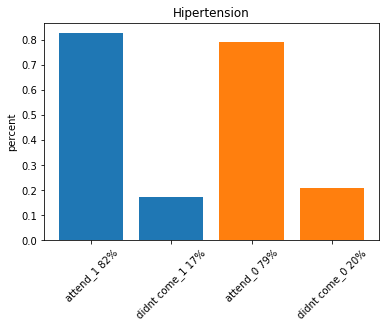

In [132]:
Draw_Col_Bar("Hipertension")

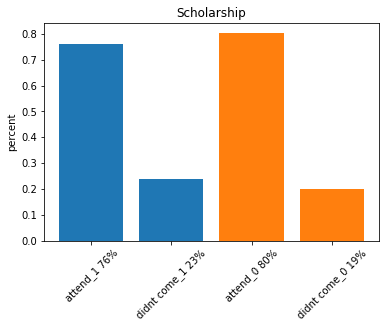

In [133]:
Draw_Col_Bar("Scholarship")

# Limitations 
    I cant use Neighbourhood of ILHAS OCEÂNICAS DE TRINDADE cause it has only two patients with 0% success.
    I cant use Neighbourhood of PARQUE INDUSTRIAL cause it has only one patient with 100% success.

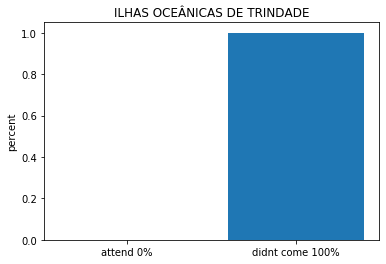

In [77]:
Place_Draw_Bar('ILHAS OCEÂNICAS DE TRINDADE') 

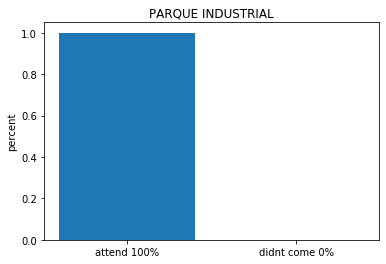

In [76]:
Place_Draw_Bar('PARQUE INDUSTRIAL') 

# Final conclusion
    1-Dont send SMS
    2-Give the Appointment day to same the day of ScheduledDay day or day after as a maximum 
    3-best Neighbourhoods are ILHA DO BOI and AEROPORTO